# 공분산과 상관계수

## 표본공분산(Sample covariance)

$${s_{xy}}=\frac{1}{N}\Sigma({x_i}-\hat{x})({y_i}-\hat{y})$$

## 표본상관계수(Sample correlation coefficient)

공분산에 각각의 표준편차 값으로 나눈 값   
각각의 표준편차를 나눠 주는 이유 자료 분포의 방향성만 분리해서 보기 위함과 표준화를 하기 위함

$${r_xy} = \frac{{s_xy}}{({s_x^2}{x_y^2})^{1/2}}$$

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 7.5 MB/s 


In [ ]:
from sklearn.datasets import load_iris
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib


In [ ]:
X = load_iris()

In [ ]:
X.keys()
X.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
sepal_length = X.data[:, 0]
sepal_width = X.data[:, 1]
petal_length = X.data[:, 2]
petal_width = X.data[:, 3]
sp.stats.pearsonr(sepal_length, petal_length)[0]

0.8717537758865831

## 상관계수 Scatter Plot


피어슨 상관계수의 경우 선형적인 관계만을 측정하기 때문에 선형적이 않으면서 관계가 있는 데이터의 경우에 피어슨 상관계수는 0

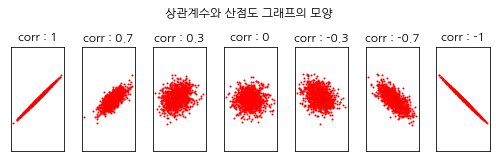

In [ ]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs) , 2))
for i, r in enumerate(corrs):
  x, y, = np.random.multivariate_normal([0,0], [[1, r],[r, 1]], 1000).T
  plt.subplot(1, len(corrs), i + 1)
  plt.plot(x,y, 'ro', ms=1)
  plt.axis('equal')
  plt.xticks([])
  plt.yticks([])
  plt.title(f'corr : {r}')

plt.suptitle('상관계수와 산점도 그래프의 모양', y=1.1)
plt.tight_layout()
plt.show()


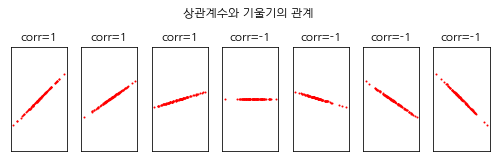

In [ ]:
# 랜덤 요소 제거
np.random.seed(1)
# 기울기 설정
slops = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
# 그래프 설정
plt.figure(figsize=(len(slops),2))
for i, s in enumerate(slops):
  # 서브플롯 배경 그리기
  plt.subplot(1, len(slops), i + 1)
  # 다변수 표준정규분포
  x, y = np.random.multivariate_normal([0,0], [[1,1], [1,1]], 100).T
  # 기울기변경
  y2 = s * y
  # 데이터 플롯 그리기
  plt.plot(x, y2, 'ro', ms=1)
  # y값과 x값의 스케일을 맞춰줌
  plt.axis('equal')
  # 특정된 x나 y값을 표현하는건데 지금은 아무것도 표현하지 않도록 설정
  # 만약 아무것도 안주면 자동으로 생성하기 때문에 [] 인자 전달
  plt.xticks([])
  plt.yticks([])
  if s > 0:
    # 서브플롯의 제목
    plt.title('corr=1')
  else:
    plt.title('corr=-1')
# 플롯의 대제목
plt.suptitle('상관계수와 기울기의 관계', y=1.1)
# 축의 글자가 겹치지 않도록 layout 설정
plt.tight_layout()
# 그래프 show
plt.show()


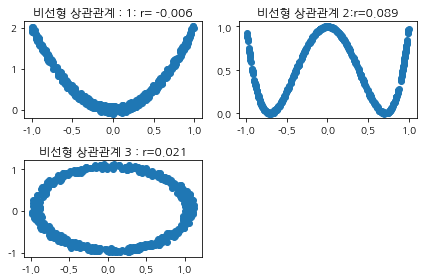

In [ ]:
n = 500
np.random.seed(2)

plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1,n)
plt.scatter(x1,y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(f'비선형 상관관계 : 1: r= {r1.round(3)}')

plt.subplot(222)
x2 = np.random.uniform(-1,1, n)
y2 = 4 * (x2**2-0.5)**2 + 0.1 * np.random.uniform(-0.1, 0.1,n)
plt.scatter(x2,y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(f'비선형 상관관계 2:r={r2.round(3)}')

plt.subplot(223)
x3 = np.random.uniform(-1,1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(f'비선형 상관관계 3 : r={r3.round(3)}')
plt.tight_layout()
plt.show()